# 🧩 Reto 4 – Integración de resultados
**Objetivo:** combinar resultados parciales en un diagnóstico integral por sitio.

### Pasos
1. Carga `resultado_temperatura.csv`, `resultado_ph.csv`, `resultado_oxigeno.csv`.
2. Únelos por `sitio` usando `merge`.
3. Crea `diagnostico_final` con reglas (parcial/total/normal).
4. Exporta `diagnostico_final.csv`.
5. Cuenta categorías con `value_counts()`.

> **Reto adicional:** gráfico de barras de distribución.

In [ ]:
import pandas as pd

# archivos
temp = pd.read_csv('../data/resultado_temperatura.csv')
ph = pd.read_csv('../data/resultado_ph.csv')
oxi = pd.read_csv('../data/resultado_oxigeno.csv')

# primeras filas
print("Temperatura:")
display(temp.head())
print("pH:")
display(ph.head())
print("Oxígeno:")
display(oxi.head())


Temperatura:


,sitio,temperatura,riesgo_termico,categoria_temp
0,Río Subachoque,18.5,No,Fría
1,Quebrada Honda (Facatativá),19.4,No,Fría
2,Río Botello (Madrid),22.7,No,Moderada
3,Afluente San José (El Rosal),20.1,No,Moderada
4,Río Villeta,28.3,Sí,Caliente


pH:


,sitio,pH,oxigeno,temperatura,clasificacion_pH,alerta_quimica
0,Quebrada Honda (Facatativá),6.3,6.2,19.4,Ácido,Alerta
1,Río Villeta,8.7,6.1,28.3,Básico,Alerta
2,Quebrada Cune (San Francisco),6.0,4.5,25.2,Ácido,Alerta
3,Río Guayuriba (La Mesa),5.9,4.8,30.5,Ácido,Alerta


Oxígeno:


,sitio,oxigeno,nivel_oxigeno,riesgo_biologico
0,Río Subachoque,7.8,alto,False
1,Quebrada Honda (Facatativá),6.2,medio,False
2,Río Botello (Madrid),5.9,medio,False
3,Afluente San José (El Rosal),8.3,alto,False
4,Río Villeta,6.1,medio,False


In [4]:
# Union de df por columna 'sitio'
df = temp.merge(ph, on='sitio').merge(oxi, on='sitio')

# resultado
display(df.head())


,sitio,temperatura_x,riesgo_termico,categoria_temp,pH,oxigeno_x,temperatura_y,clasificacion_pH,alerta_quimica,oxigeno_y,nivel_oxigeno,riesgo_biologico
0,Quebrada Honda (Facatativá),19.4,No,Fría,6.3,6.2,19.4,Ácido,Alerta,6.2,medio,False
1,Río Villeta,28.3,Sí,Caliente,8.7,6.1,28.3,Básico,Alerta,6.1,medio,False
2,Quebrada Cune (San Francisco),25.2,No,Moderada,6.0,4.5,25.2,Ácido,Alerta,4.5,bajo,True
3,Río Guayuriba (La Mesa),30.5,Sí,Caliente,5.9,4.8,30.5,Ácido,Alerta,4.8,bajo,True


In [8]:
def diagnostico(row):
    fuera = 0
    # Rangos
    if not (10 <= row['temperatura_x'] <= 30):
        fuera += 1
    if not (6.5 <= row['pH'] <= 8.5):
        fuera += 1
    if not (5 <= row['oxigeno_x'] <= 9):
        fuera += 1
    
    if fuera == 0:
        return 'normal'
    elif fuera == 1:
        return 'parcial'
    else:
        return 'total'

df['diagnostico_final'] = df.apply(diagnostico, axis=1)

display(df.head())


,sitio,temperatura_x,riesgo_termico,categoria_temp,pH,oxigeno_x,temperatura_y,clasificacion_pH,alerta_quimica,oxigeno_y,nivel_oxigeno,riesgo_biologico,diagnostico_final
0,Quebrada Honda (Facatativá),19.4,No,Fría,6.3,6.2,19.4,Ácido,Alerta,6.2,medio,False,parcial
1,Río Villeta,28.3,Sí,Caliente,8.7,6.1,28.3,Básico,Alerta,6.1,medio,False,parcial
2,Quebrada Cune (San Francisco),25.2,No,Moderada,6.0,4.5,25.2,Ácido,Alerta,4.5,bajo,True,total
3,Río Guayuriba (La Mesa),30.5,Sí,Caliente,5.9,4.8,30.5,Ácido,Alerta,4.8,bajo,True,total


In [10]:
df.to_csv('../data/diagnostico_final.csv', index=False)
print("Archivo '../data/diagnostico_final.csv' exportado correctamente.")


Archivo '../data/diagnostico_final.csv' exportado correctamente.


In [12]:
conteo = df['diagnostico_final'].value_counts()
print(conteo)


diagnostico_final
parcial    2
total      2
Name: count, dtype: int64


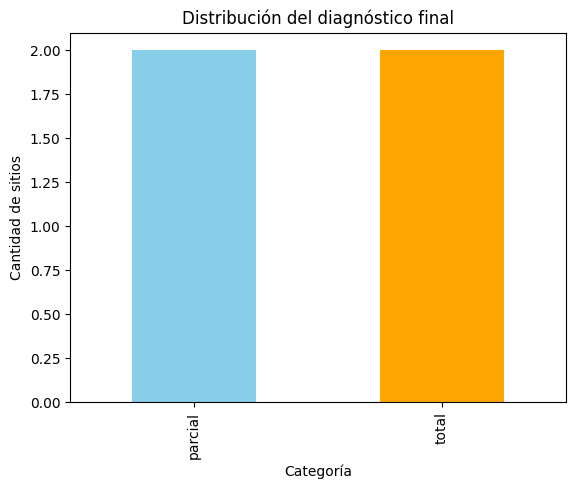

In [13]:
import matplotlib.pyplot as plt

conteo.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribución del diagnóstico final')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de sitios')
plt.show()
